In [1]:
import ipywidgets
import numpy as np
import tensorflow as tf
import matplotlib.pyplot
%matplotlib inline

def init_plot():
    plt = matplotlib.pyplot
    plt.figure(figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
    plt.ylim(-1.0, 4.0)
    plt.grid(True, which='both', color='lightblue', linestyle="dotted")
    plt.axhline(y=0, color='lightgrey', linestyle="dashed")
    plt.axvline(x=0, color='lightgrey', linestyle="dashed")
    return plt

# Gradient descent w tensorflow...

Find a really easy local minimum, as an example.

### Setup

In [2]:
sess = tf.Session()
learning_rate = 0.1
x = tf.Variable([10.0], 'x')
b = 1.0
steps = 16

x_history = []
sess.run(tf.global_variables_initializer())

### The function to minimize

In [3]:
f = pow((x + b), 2.0)
minima = b * -1.0

### Run optimizer

In [4]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
for i in range(0, steps):
    gd = optimizer.minimize(f, var_list=(x))
    sess.run(gd)
    x_history.append(list(sess.run(x)))

### Results

'Error -0.309622'

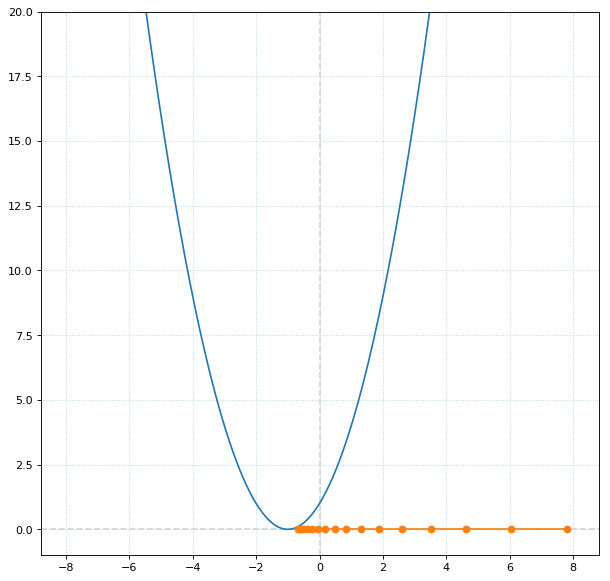

In [5]:
x_history_flat = [x[0] for x in x_history]
plot_x = np.linspace(-8, 8, 300)
plt = init_plot()
plt.ylim(-1.0, 20.0)
plt.plot(plot_x, pow(plot_x + b, 2.0), '-')
plt.plot(x_history_flat, [0.0] * len(x_history_flat), 'o-')
"Error %f" % (minima - x_history_flat[-1])